# task definition
Train a model to classify a movie rewiew in positive or negative polarity.

# data collection
dataset of IMDb, available at: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

it uses 'wget' python module. Use ```pip install wget``` to install it!


In [1]:
import wget
import os
import tarfile

filename = "dataset/aclImdb_v1.tar.gz"

dataset_link = "http://ai.stanford.edu/~amaas/data/sentiment/{}".format(filename)
try:
    os.mkdir("dataset")
except FileExistsError:
    pass

if not os.path.isfile(filename):
    file = wget.download(dataset_link, out='dataset/aclImdb_v1.tar.gz')

    tar = tarfile.open(filename, "r:gz")
    tar.extractall("dataset")
    tar.close()

# data load and visualization

In [2]:
# montar dataset com valores de 1 a 4 e de 7 a 10, ao invés de binário
dataset_path = 'dataset/aclImdb'
train_positive_files = ['train/pos/'+f for f in os.listdir(dataset_path+'/train/pos') \
                        if os.path.isfile(os.path.join(dataset_path+'/train/pos', f))]

train_negative_files = ['train/neg/'+f for f in os.listdir(dataset_path+'/train/neg') \
                        if os.path.isfile(os.path.join(dataset_path+'/train/neg', f))]

test_positive_files = ['test/pos/'+f for f in os.listdir(dataset_path+'/test/pos') \
                       if os.path.isfile(os.path.join(dataset_path+'/test/pos', f))]

test_negative_files = ['test/neg/'+f for f in os.listdir(dataset_path+'/test/neg') \
                       if os.path.isfile(os.path.join(dataset_path+'/test/neg', f))]

all_files = list(set().union(train_positive_files,train_negative_files, test_positive_files, test_negative_files))

In [3]:
dataset = {'trainset':[], 
           'polarity':[], 
           'review':[]}

for file in all_files:
    polarity = file.split('.')[0].split('_')[1]
    with open(os.path.join(dataset_path, file), 'r') as text_file:
        dataset['trainset'].append(file.split('/')[0])
        dataset['polarity'].append(polarity)
        dataset['review'].append(text_file.readlines()[0])

In [4]:
import pandas as pd
dataframe = pd.DataFrame(data=dataset)

In [5]:
dataframe.columns

Index(['trainset', 'polarity', 'review'], dtype='object')

In [6]:
dataframe

,trainset,polarity,review
0,train,10,This is te cartoon that should have won instea...
1,train,9,What ever happened to Michael Keaton? What a g...
2,train,10,At first I didn't like the movie cause of it b...
3,train,8,Raggedy Ann & Andy is the first movie I ever s...
4,train,3,If you've ever wanted to see a film that stres...
5,test,1,Taste is a subjective thing. Two people can wa...
6,test,8,I'm an action movie fan but until today I've n...
7,train,7,I did not set very high expectations for this ...
8,test,2,"I gave ""Airport '79"" only two stars because it..."
9,train,2,"In a movie that follows a struggling actor, pl..."


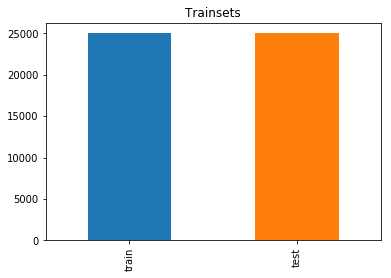

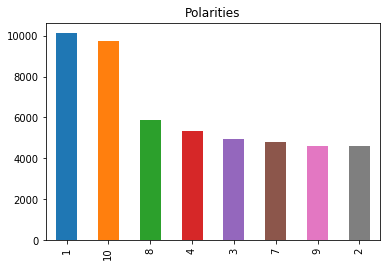

In [19]:
import matplotlib.pyplot as plt

dataframe['trainset'].value_counts().plot(kind='bar',title='Trainsets')
plt.show()

dataframe['polarity'].value_counts().plot(kind='bar',title='Polarities')
plt.show()

In [8]:
dataframe['review_size'] = dataframe['review'].apply(len)
dataframe['review_size'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_size, dtype: float64

In [9]:
dataframe[dataframe['review_size']==32]

,trainset,polarity,review,review_size
36053,test,2,"Read the book, forget the movie!",32


# pre processing

In [10]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(review):
    review = REPLACE_NO_SPACE.sub("", review.lower())
    review = REPLACE_WITH_SPACE.sub(" ", review)
    
    return review

dataframe['clean_review'] = dataframe['review'].apply(preprocess_reviews)

In [11]:
dataframe

,trainset,polarity,review,review_size,clean_review
0,train,10,This is te cartoon that should have won instea...,825,this is te cartoon that should have won instea...
1,train,9,What ever happened to Michael Keaton? What a g...,647,what ever happened to michael keaton what a gr...
2,train,10,At first I didn't like the movie cause of it b...,3856,at first i didnt like the movie cause of it be...
3,train,8,Raggedy Ann & Andy is the first movie I ever s...,721,raggedy ann & andy is the first movie i ever s...
4,train,3,If you've ever wanted to see a film that stres...,3871,if youve ever wanted to see a film that stress...
5,test,1,Taste is a subjective thing. Two people can wa...,1514,taste is a subjective thing two people can wat...
6,test,8,I'm an action movie fan but until today I've n...,1052,im an action movie fan but until today ive nev...
7,train,7,I did not set very high expectations for this ...,428,i did not set very high expectations for this ...
8,test,2,"I gave ""Airport '79"" only two stars because it...",2196,i gave airport 79 only two stars because its a...
9,train,2,"In a movie that follows a struggling actor, pl...",863,in a movie that follows a struggling actor pla...


# feature engineering

In [12]:
train_reviews = dataframe[dataframe['trainset'] == 'train']['clean_review'].values.tolist()
train_classes = dataframe[dataframe['trainset'] == 'train']['polarity'].values.tolist()
test_reviews = dataframe[dataframe['trainset'] == 'test']['clean_review'].values.tolist()
test_classes = dataframe[dataframe['trainset'] == 'test']['polarity'].values.tolist()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

cv = CountVectorizer(binary=True)
cv.fit(train_reviews)
X = cv.transform(train_reviews)
X_test = cv.transform(test_reviews)

In [14]:
#save cv model
try:
    os.mkdir("models")
except FileExistsError:
    pass

s = pickle.dumps(cv)
with open('models/cv_pickle', 'wb') as pickle_file:
    pickle_file.write(s)

# Training

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, train_classes, train_size = 0.75
)

/Users/erick/virtualenvs/NLP-IA_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
for c in [0.001, 0.005, 0.009, 0.01, 0.015, 0.02, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    

In [16]:
final_model = LogisticRegression(C=0.009)
final_model.fit(X, train_classes)
print ("Final Accuracy: %s" 
       % accuracy_score(test_classes, final_model.predict(X_test)))

Final Accuracy: 0.42052


In [17]:
s = pickle.dumps(final_model)
with open('models/final_model', 'wb') as pickle_file:
    pickle_file.write(s)

In [ ]:
# try SVM
from sklearn.svm import SVC
svm_model = SVC(C=1.0, 
                kernel=’rbf’, 
                degree=3, 
                gamma=’auto_deprecated’, 
                coef0=0.0, 
                shrinking=True, 
                probability=False, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=True, 
                max_iter=-1, 
                decision_function_shape=’ovr’, 
                random_state=None)
svm_model.fit(X, train_classes) 

# see the SVC parameters and try tunning them: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
print ("Final Accuracy SVM: %s" 
       % accuracy_score(test_classes, svm_model.predict(X_test)))

# evaluation

In [18]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
#     ('excellent', 0.9288812418118644)
#     ('perfect', 0.7934641227980576)
#     ('great', 0.675040909917553)
#     ('amazing', 0.6160398142631545)
#     ('superb', 0.6063967799425831)
    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    
#     ('worst', -1.367978497228895)
#     ('waste', -1.1684451288279047)
#     ('awful', -1.0277001734353677)
#     ('poorly', -0.8748317895742782)
#     ('boring', -0.8587249740682945)

('worst', 0.8032095803664313)
('awful', 0.5351479745332652)
('waste', 0.4823428484514431)
('bad', 0.4246554490355187)
('terrible', 0.4119435134008794)
('best', -0.38899174329977687)
('great', -0.3746348095447862)
('excellent', -0.37156543140150433)
('the', -0.28493251613195175)
('and', -0.2593851691361884)


# deploying
install flask using ```pip3 install flask```. Let's create a REST service to make it available!
The following code must be put in a python file ```app.py```. 

In the same directory of the previous file, run the commands bellow:

```chmod a+x app.py```

```python3 app.py```

In [ ]:
from flask import Flask, request
from sklearn.feature_extraction.text import CountVectorizer
import re
import pickle

# regular expressions
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# load vectorization model
pickle_file = open('models/cv_pickle', 'rb')
cv = pickle.loads(pickle_file.read())

# load ML model
pickle_file = open('models/final_model', 'rb')
final_model = pickle.loads(pickle_file.read())


# prepare input to be classified
def prepare_input(review):
    review = REPLACE_NO_SPACE.sub("", review.lower())
    review = REPLACE_WITH_SPACE.sub(" ", review)

    return cv.transform([review])


app = Flask(__name__)

@app.route('/api/v1.0/scorefy', methods=["GET"])
def scorefy():
    query_parameters = request.args
    review = query_parameters.get('r')
    return final_model.predict(prepare_input(review))[0]


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
